# github.com/PacktPublishing/IPython-Interactice-Computing-and-Visualization-Cookbook-Second-edition/blo

In [3]:
import numpy as np
import sklearn as sk
import pandas as pd
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=skd.load_boston()
data
#multiarray attribute load_boston will always return a array and not table.It is a linear regression model(boston always)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
reg=ske.RandomForestRegressor()
reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [6]:
X=data['data']
y=data['target']
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
reg.fit(X,y)

C:\Users\piu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [8]:
fet_ind=np.argsort(reg.feature_importances_)[::-1]
fet_imp=reg.feature_importances_[fet_ind]
fet_ind
#fet_imp
#feature_importances_ :- features(feature analysis) gives relation between attribute
#[::-1] gives indexing will start from 0
#fet_ind is key and fet_imp is value

array([ 5, 12,  7,  0,  4, 10,  6,  9, 11,  8,  2,  3,  1], dtype=int64)

C:\Users\piu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'features importance')

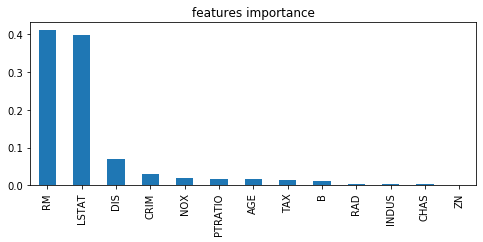

In [9]:
fig,ax=plt.subplots(1,1,figsize=(8,3))
labels=data['feature_names'][fet_ind]
pd.Series(fet_imp,index=labels).plot('bar',ax=ax)
ax.set_title('features importance')
#from this graph we can consider decision tree based on lmstat and rm
#this is a univariate analysis

Text(0, 0.5, 'VAlue of houses($)')

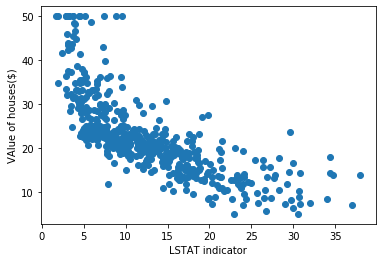

In [10]:
fig,ax=plt.subplots(1,1)
ax.scatter(X[:,-1],y)
ax.set_xlabel('LSTAT indicator')
ax.set_ylabel('VAlue of houses($)')
#negative linear regression 

In [14]:
from sklearn import tree
import os
#import graphviz
#from graphviz import Source
#tree.export_graphviz(reg.estimators_[0],'tree.dot')
from PIL  import Image
tree.export_graphviz(reg.estimators_[0],'tree.dot')
os.system('dot -Tpng tree.dot -o tree.png' )
Image.open('tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'